# Datan esikäsittely.

Luetaan tiedosto DataFrameen aikasarjana (T6.1 / 1p)

Luetaan tiedosto, mutta asetetaan tuotettavaan DataFrameen vain muutama sarake, jonka arvoista olemme kiinnostuneita. Asetetaan Date-sarake DataFrame-taulukon indeksiksi, jolloin saamme päivämäärän indeksikentäksi.

Toteuta seuraavat kohdat tässä tehtävässä:

- parsi päivämääräkenttä Date-päivämäärämuotoon
- Aseta Date-kenttä DataFramen indeksisarakkeeksi ja poista Date-kenttä DataFramen sarakkeista
- Lopputuloksena DataFramessa on Date-indeksin lisäksi seuraavat sarakkeet: Opening price, High price, Low price, Closing price, Total volume eli poista muut sarakkeet jo tässä vaiheessa

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url_src = "https://student.labranet.jamk.fi/~pelju/datanav_k22/topic6/data/telia2018.csv"

df = pd.read_csv(url_src, delimiter=";", decimal=".")

df = df.set_index('Date')

df = df[['Opening price', 'High price', 'Low price', 'Closing price', 'Total volume']]

df.dtypes

df.head()


,Opening price,High price,Low price,Closing price,Total volume
Date,,,,,
2018-12-28,"4,00","4,117","3,995","4,076",988115
2018-12-27,"4,087","4,112","3,99","3,995",1195487
2018-12-21,"4,12","4,143","4,043","4,122",919570
2018-12-20,"4,151","4,186","4,119","4,163",941170
2018-12-19,"4,17","4,213","4,17","4,18",651864


# Järjestetään tiedot

Toteuta seuraavat kohdat tässä tehtävässä:

- Tulosta ensimmäiset kymmenen päivää Date arvon perusteella
- Tulosta tulokset järjestettynä Total volume-kentän mukaan (suurin arvo ensimmäisenä).
- Luo myös uusi kenttä High - Low, joka sisältää korkeimman hinnan ja matalimman hinnan välisen erotuksen

In [3]:
# Tulosta ensimmäiset kymmenen päivää Date arvon perusteella

df_date = df.sort_values(by='Date')

df_date.head(10)

df_date

,Opening price,High price,Low price,Closing price,Total volume
Date,,,,,
2018-01-02,"3,75","3,752","3,718","3,729",1717521
2018-01-03,"3,758","3,758","3,73","3,755",1823437
2018-01-04,"3,76","3,786","3,756","3,78",1540541
2018-01-05,"3,78","3,85","3,777","3,85",1306020
2018-01-08,"3,85","3,86","3,824","3,845",2151101
...,...,...,...,...,...
2018-12-19,"4,17","4,213","4,17","4,18",651864
2018-12-20,"4,151","4,186","4,119","4,163",941170
2018-12-21,"4,12","4,143","4,043","4,122",919570


In [4]:
# Tulosta tulokset järjestettynä Total volume-kentän mukaan (suurin arvo ensimmäisenä).

df_total = df.sort_values(by='Total volume', ascending=False)

df_total

,Opening price,High price,Low price,Closing price,Total volume
Date,,,,,
2018-04-20,"3,85","4,02","3,85","3,988",9704458
2018-02-08,"3,801","3,801","3,662","3,672",7977900
2018-04-23,"3,997","4,123","3,983","4,105",7701410
2018-02-12,"3,69","3,779","3,573","3,76",6642300
2018-10-19,"3,988","3,988","3,766","3,901",5104780
...,...,...,...,...,...
2018-11-09,"4,086","4,113","4,081","4,094",414456
2018-10-05,"3,929","3,952","3,913","3,926",383337
2018-11-22,"3,927","3,93","3,892","3,892",364323


In [5]:
# Luo myös uusi kenttä High - Low, joka sisältää korkeimman hinnan ja matalimman hinnan välisen erotuksen

df_high_low = df['High - Low'] = df.apply(lambda row: f"{row['High price']} - {row['Low price']}", axis=1)

df_high_low

Date
2018-12-28    4,117 - 3,995
2018-12-27     4,112 - 3,99
2018-12-21    4,143 - 4,043
2018-12-20    4,186 - 4,119
2018-12-19     4,213 - 4,17
                  ...      
2018-01-08     3,86 - 3,824
2018-01-05     3,85 - 3,777
2018-01-04    3,786 - 3,756
2018-01-03     3,758 - 3,73
2018-01-02    3,752 - 3,718
Length: 250, dtype: object

# Datan visualisointi (T6.3 / 1p)

Toteuta seuraavat kohdat tässä tehtävässä:

Visualisoi aikasarjadata haluamallasi tavalla.

- Valitse tähän ainakin kaksi eri kuvaajatyyppiä
- Visualisoi data kenttien 'Low price' ja 'High price' avulla
- Visualisoi esim. käyttäen rolling-operaattorin antama tasaisesti painotettu sarja
- Visualisoi antaen enemmän painoa tuoreimmille havainnoille (ewm (exponentially weighted moving) -operaattori). Tällainen sarja adaptoituu nopeammin muutoksiin kuin rolling-operaattorin antama tasaisesti painotettu sarja.

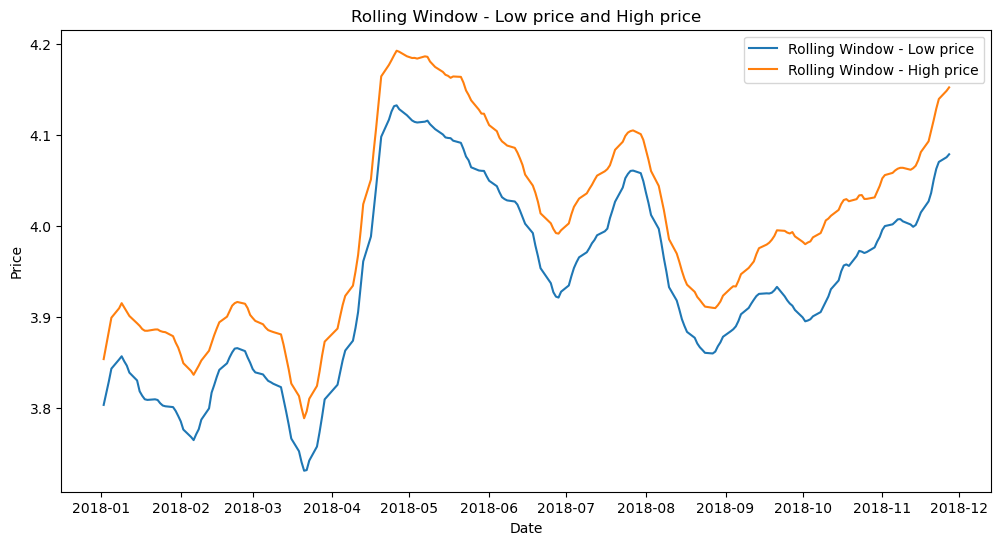

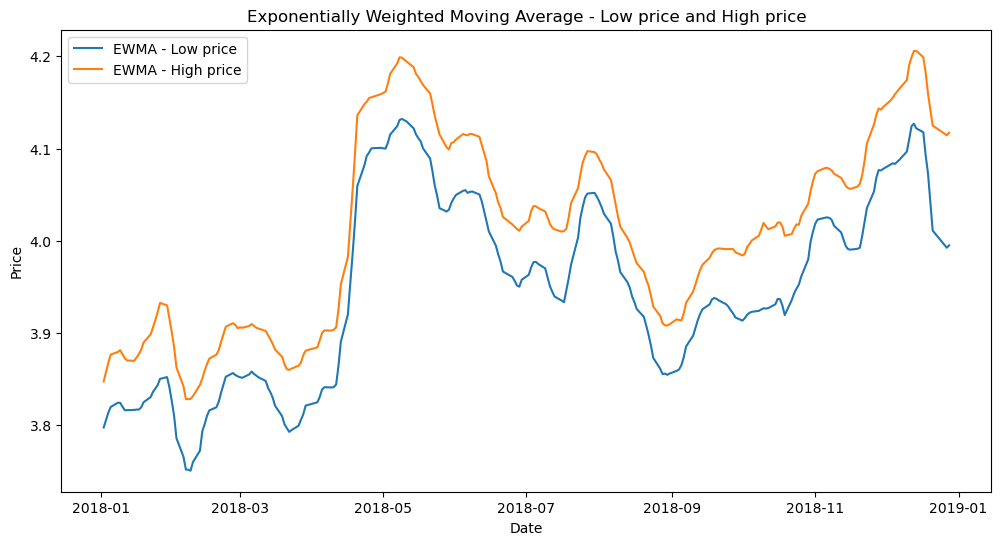

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url_src = "https://student.labranet.jamk.fi/~pelju/datanav_k22/topic6/data/telia2018.csv"

df = pd.read_csv(url_src, delimiter=";", decimal=".")

df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

df = df[['Low price', 'High price']].replace(',', '.', regex=True).astype(float)

df_rolling = df.rolling(window=20).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_rolling['Low price'], label='Rolling Window - Low price')
plt.plot(df_rolling['High price'], label='Rolling Window - High price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling Window - Low price and High price')
plt.legend()
plt.show()


df_ewm = df.ewm(span=20).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_ewm['Low price'], label='EWMA - Low price')
plt.plot(df_ewm['High price'], label='EWMA - High price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Exponentially Weighted Moving Average - Low price and High price')
plt.legend()
plt.show()


# Outlierit ja korrelaatiot

Toteuta seuraavat kohdat tässä tehtävässä:

- Datasta tulee tarkastaa ainakin jokaisen numeerisen sarakkeen merkittävät poikkeamat. Merkittävästi poikkeava arvo voidaan tarvittaessa korvata (millä tavalla?).
- Rivin poikkeamien havaitsemiseen voi käyttää 2% ja 98% prosenttipisteitä datasta
- laske myös Pearsonin korrelaatiokerroin sekä selityskerroin.

TODO: laske poikkeamat (2% - 98%)

Korrelaatio

- laske Pearsonin korrelaatiokerroin sekä selityskerroin. Liitä mukaan myös Sanallinen tulkinta tuloksista.

Kahden muuttujan välinen riippuvuus
- Kahden määrällisen muuttujan riippuvuutta tarkastellaan hajontakaavion ja korrelaatiokertoimen avulla.

Hajontakaavio
- Hajontakaavio antaa nopea silmäyksen kahden muuttujan arvojen jakautumiseen.

Yleensä ollaan kiinnostuneita liittyykö suuriin x:n arvoihin suuria tai pieniä y:n arvoja (korrelaatiota havaittavissa) vai satunnaisia y:n arvoja (ei merkittävää korrelaatiota).

TODO: Laske Opening price korrelaatio kenttään Closing price

TODO: Laske Opening price korrelaatiot muihin kenttiin

Ja vielä Kaikkien luettujen sarakkeiden väliset korrelaatiot

TODO: Laske kaikkien kenttien korrelaatiot

Selityskerroin

TODO: Laske Selityskerroin

HeatMap
- HeatMap on 2-ulotteinen matriisikuvio, joka antaa visualisoinnin numeerisista tiedoista solujen muodossa. HeatMap-kartan värisävyt edustavat arvon suhdetta DataFrameen.

Merkittävät poikkeamat:
  Date  Bid  Ask  Opening price  High price  Low price  Closing price  \
0  NaN  NaN  NaN            NaN         NaN        NaN            NaN   
1  NaN  NaN  NaN            NaN         NaN        NaN            NaN   
2  NaN  NaN  NaN            NaN         NaN        NaN            NaN   

   Average price  Total volume  Turnover  Trades  Unnamed: 11  
0            NaN           NaN       NaN     NaN          NaN  
1            NaN           NaN       NaN     NaN          NaN  
2            NaN           NaN       NaN     NaN          NaN  
Pearsonin korrelaatiokerroin:
                    Bid       Ask  Opening price  High price  Low price  \
Bid            1.000000  0.999975       0.953138    0.981918   0.981098   
Ask            0.999975  1.000000       0.953027    0.981811   0.981178   
Opening price  0.953138  0.953027       1.000000    0.976568   0.974634   

               Closing price  Average price  Total volume  Turnover    Trades  \
Bid            

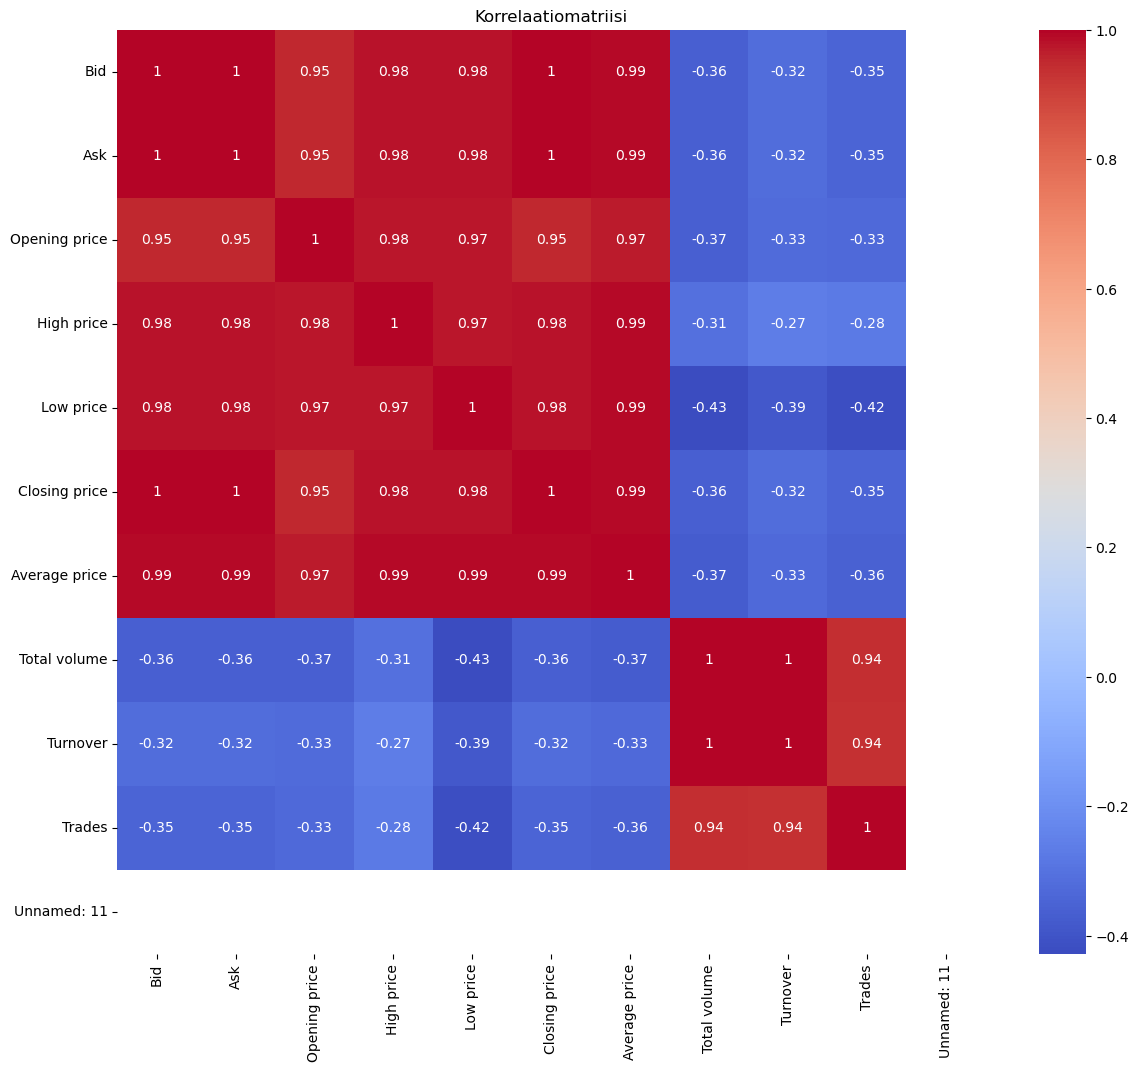

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

url_src = "https://student.labranet.jamk.fi/~pelju/datanav_k22/topic6/data/telia2018.csv"

df = pd.read_csv(url_src, delimiter=";", decimal=".")

numeric_columns = ['Bid', 'Ask', 'Opening price', 'High price', 'Low price', 'Closing price', 'Average price', 'Total volume', 'Turnover', 'Trades']
df[numeric_columns] = df[numeric_columns].replace(',', '.', regex=True).astype(float)

outliers = df[(df < quantiles.loc[0.02]) | (df > quantiles.loc[0.98])]
print("Merkittävät poikkeamat:")
print(outliers.head(3))

df.fillna(0, inplace=True)
# Pearsonin korrelaatiokerroin
correlation_matrix = df.corr(method='pearson')
print("Pearsonin korrelaatiokerroin:")
print(correlation_matrix.head(3))

# Selityskerroin
explained_variance = df.corr()['Closing price']**2
print("Selityskerroin:")
print(explained_variance.head(3))

# HeatMap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelaatiomatriisi')
plt.show()